# Introduction to Python using Turing patterns

## 1. Introduction
---
**First of, within this course [this page](https://docs.python.org/3/tutorial/index.html) will be mentioned a lot. It is a really good (maybe a bit crude) source for information and it is the official Python page so it should also be quite accurate.**

**Moreover, if you would like to read more about python, you can find a good list of books about Python [there](https://wiki.python.org/moin/PythonBooks) (not all of them are free).**

**Here are two free online books that could be worth reading to go further:**
- **[IPython Cookbook, Second Edition (2018)](https://ipython-books.github.io/) In depth book about python. While the book is of general interest and definitely worth reading, [that](https://ipython-books.github.io/124-simulating-a-partial-differential-equation-reaction-diffusion-systems-and-turing-patterns/) part was especially helpful for this course**
- **[From Python to Numpy](https://www.labri.fr/perso/nrougier/from-python-to-numpy/) Especially useful when wanting to use Numpy, which you probably should!**

### 1.1 Goal of this course
This course aim at teaching the basics of coding using reaction diffusion simulations as a support, more specifically the Turing patterns.
The mathematics or the biology behind the Turing patterns is not necessary but it might help to understand better what is happening behind the hood.

At the end of the course, we would like you to be able to write small pieces of code to do basic data analysis.
No computation level is required though it is good to keep in mind that at the time being, this notebook alone might not be enough: the teachers are still necessary (unfortunately?) to introduce the concepts and to help answering the potential questions.

### 1.2 Turing patterns
Now about Turing patterns, they were introduced by Alan Turing in the article [The Chemical Basis of Morphogenesis](https://www.dna.caltech.edu/courses/cs191/paperscs191/turing.pdf).
They will not been much discussed here but fill free to ask questions or to look over [there](https://en.wikipedia.org/wiki/Reaction%E2%80%93diffusion_system) for more information.

What is important to keep in mind is that in its simplest form, a Turing pattern is the result of the interaction between an activator and its inhibitor and their co-diffusion across a set of cells.

It is this interaction and diffusion that we will model in this course. We will also learn how to graphically represent these patterns.

A little bit of knowledge about how to model these interactions is necessary to better understand the remaining of the course.
First, we will be talking about an activator that will name $A$ and an inhibitor that will name $I$. Their concentration values will be refered to as $a$ and $i$ respectively.

The gene regulation network that we are considering here is the simple one where $A$ auto-activates and activates $I$ and $I$ inhibits $A$:

<img src="Images/GRN.png" alt="Gene Regulation Network" width="200"/>

> _**To go a little bit further (not required):**_
> 
> From this network, we can extrat the interaction between activator $A$ and an inhibitor $I$ as follow:
> 
> $A \rightarrow A$ ($A$ is auto activated)
> 
> $A \rightarrow I$ ($A$ activates $I$)
> 
> $I \dashv A$ ($I$ inhibits $A$)
> 
> These interactions can be modeled multiple ways.
> We decided here to use the [FitzHugh–Nagumo model](https://en.wikipedia.org/wiki/FitzHugh%E2%80%93Nagumo_model) (for no particular reason) resulting in the following equations:
> 
> $\frac{\delta a}{\delta t} = \mu_a\Delta a + a - a^3 - i + k$ [1]
> 
> $\tau \frac{\delta i}{\delta t} = \mu_i\Delta i + a - i$ [2]
> 
> These are partial differential equations that represent the change of concentration of $A$ ($\delta a$) or $I$ ($\delta i$) in time ($\delta t$).
>
> In equation [1], $\Delta a$ is the potential diffusion $A$ and $\mu_a$ is the diffusion coefficient.
> $+ a$ is the auto-activation of $A$, $-a^3$ is the degradation, $-i$ is the inhibition from $I$ and $k$ is a constant to determine whether $A$ acts as a source ($0<k$), a sink ($k<0$) or is neutral ($k=0$).
>
> In equation [2], $\Delta i$ is the potential diffusion of $I$ and $\mu_i$ is the diffusion coefficient.
> $+a$ is the activation from $A$, $-i$ is the degradation and $\tau$ allows to modulate the amplitude of change of concentration of $I$ compared to the one of the activator $A$.

It is important to know that to model the previous network it is necessary to decide on some values, the parameters of the model:
- the diffusion coefficients $\mu_a$ and $\mu_i$ (refered to as `mu_a` and `mu_i` in the code)
- the constant $\tau$ (refered to as `tau`)
- the constant $k$ (refered to as `k`)

Because we will solve the differential equations numerically (as opposed to analytically) using "simple" numerical models, we will fix the value of $\delta t$. Therefore:
- $\delta t$ is a parameter (refered to as `dt`)

Moreover other values are necessary for the computation also need to be decided:
- the size of the grid we will be working on, ie the number of cells considered (refered to as `size`)
- the distance between two cells (ie the space step: `dx` and `dy`)
- the total time of the simulation (`T`)
- the number of iterations (`n`, which is determined by the ratio of `T` over `dt`)

### 1.3 Coding in Python
The goal of this course is for you to learn the basics of __coding__ in __Python__, but what does that really mean, or more specifically, what do we (the "teachers") mean?

#### 1.3.1 What is coding?
Coding is giving a set of instructions to a computer for it to do a task.
The tasks can be as trivial as:
```
Give the result of 1 + 0
```
or, slightly more complex:
```
If the key 'a' from the keyboard is stroke, display the letter 'a' on the screen
```
or quite complex:
```
Help proving the 4-color theorem
```
(see [Computer-assisted proofs](https://en.wikipedia.org/wiki/Computer-assisted_proof))

#### 1.3.2 Progammation language
To communicate and give instructions to a computer and mainly the Computer Processing Unit (CPU), it is necessary to write the said instructions in a language that the CPU can indeed understand.

There are multiple types and sub-types of languages but here are two (maybe) main ones:
- assembly language (specific to each CPU)
- coding languages that will use compilers or interpreters to transform the “common language accross operating systems (Windows, Mac, Linux, ...)” an assembly language that the CPU can understand.

There are many different coding languages: C++, Visual Basic, Java, R, Go, ...

In this class we will use Python as our language of choice.
This choice that was mainly driven by three reasons:
- it is the language that I and many other teachers of this class are most confortable with
- it is an opensource language
- it is probably the opensource language that is today the most used in biology and datascience

#### 1.3.3 What computers are good and not so good at
Computers have strengths and weaknesses. They are especially good at:
- performing basic operations: additions, multiplications, ...
- accessing their short and long term memory

For example, current common processors are working at $2.5GHz\simeq 2.5\times 10^9$ actions per second, meaning that if you would perform 1 action every second it would take you about 800 years to perform as many actions as a computer is doing in one second.

Computers are also good at storing information and accessing it.
Computers can store about 1TB of data in slow-to-access memory and about 32GB of data in fast access memory (RAM).
To put that in context, 1 hour of Netflix movie in HD weights about 3GB, so 3TB is 1000 hours of Netflix movie which is about 42 days of film.

On top of that, computers can access the data in memory quickly.
Computers can read from 80 to 160MB per second, Solid State Drives (SSD) can read at a speed of 550MB per seconds.
In other words, a computer can learn "by heart" the whole _A song of Ice and Fire_ series in about a second.
Finally, Random Access Memory (RAM), which is the memory that directly exchange information with the CPUs read at a speed of about 1500MHz.
(Note that for read/write intensive processes it can become a limiting factor for the overal processing speed)

On the flip side, computers are not good at everything. For example, they are bad at:
- Pattern recognition
- Being creative (building hypothesis, making jokes, writting good novels, ...)
- Anything that doesn’t have pre-existing data for

Though, these limitations have been pushed significantly recently thanks to the artificial intelligence and deep learning revolution:
- AlphaGO
- Computers can now have intuition like behaviors that human can not understand

#### 1.3.4 Learning a programming language
Therefore, to code, you need to learn a programming language (here Python).
Programming languages are all at least somewhat different and have specific rules but most of them rely on a common set of paradigms:
- they have variables
- they have datastructures (list, heaps, hashmaps, ...)
- they have conditional statements

Before being able to write some code, it is important to go through these basic and mostly common "rules"

## 2. Variables
---
Variables are symbolic names where information or values can be stored.

They are the cornerstone of coding, they allow to store in memory values and to access them later on. In our example the variables have been decribed earlier (`mu_a`, `tau`, `size`, ...)

To assign an information to a variable, the `=` operator is used.

> ⚠️ be careful, `=` is the assignment operator. To check the equality between two variables, the required operator is `==` ⚠️

For example after the following line of code is ran:

In [1]:
a_number = 0
a_number = 10
another_number = 1

The variable `a_number` used to contain the value `0` and now contains the value `10`.

The variable `another_number` contains the values `1`.

It is possible to display what is contained in a variable using the fuction `print` for example:

In [2]:
print(f'a_number --> {a_number}')

a_number --> 10


The content of a variable can be stored in another variable and then changed without altering it:

In [3]:
a_number = 5
another_number = a_number
a_number = 1
print(f'another_number --> {another_number}')
print(f'a_number --> {a_number}')

another_number --> 5
a_number --> 1


Variables can contain most (computational) things (especially in Python).
For example they can contain different types of data such as `list`, `dictionary` or `ndarray` (we will see what they are right after)

In variables can also be stored the result of an operation:

In [4]:
nb1 = 1
nb2 = 3
sum_nb1_2 = nb1 + nb2
print(f'nb1 --> {nb1}')
print(f'nb2 --> {nb2}')
print(f'sum_nb1_2 = nb1 + nb2 --> {sum_nb1_2}')

nb1 --> 1
nb2 --> 3
sum_nb1_2 = nb1 + nb2 --> 4


### 2.1 Exercices:
Before any exercice, import the `Correction` module which allows you to check out the correction of the exercices the following way:
```python
Correction(<exo_num>)
```
You can import the function as shown just bellow. It needs to be imported only once.

In [5]:
from Resources.Answers import answer

#### Exercice 1
Set the value of the variables necessary for the model as follow:
- mu_a: 0.0002.8
- mu_i: 0.005
- tau: 0.1
- k: -0.005
- size: 100 
- dx: 2 divided by the size of the grid
- dy: 2 divided by the size of the grid
- T: 9
- dt: 0.001
- n: number of iterations which is the total time `T` divided by the time step `dt`

In [6]:
### Write the answer of the previous question here.
# You can check the answer by running answer(1)

#### Exercice 2
Given a variable `nb1` and a variable `nb2`, put the values of each other variables in the other one

(Note that we are using the library `random` to generate random numbers)

In [7]:
from random import randint # To generate random numbers so you can't really cheat
nb1 = randint(0, 5)
nb2 = randint(6, 10)
print(f'nb1 before: {nb1}')
print(f'nb2 before: {nb2}')
'''
To do: swap a and b values
'''
print(f'nb1 after: {nb1}')
print(f'nb2 after: {nb2}')

nb1 before: 4
nb2 before: 8
nb1 after: 4
nb2 after: 8


## 3. Data structures
---
When coding, different data types and data structures can be used. For example we already saw few data types:
- Integers (refered to as `int` in Python): `0`, `1`, `-10`, ...
- Floating numbers (refered to as `float` in Python): `0.01`, `1.0`, `1.2e10`, ...
- Strings (refered to as `str` in Python): `'Hello'`, `"world"`, `'12+34'`, ...

But of course other data types exist:
- Lists (`list`): `[1, 2, 3]`, `[1, None, 0.4]`, `[1, [1, 2], [3], ['Hello'], 'World']`, ...
- Tuples (`tuple`): `(1, 2, 3)`, `(1, None, 0.4)`, ...
- Dictionaries (`dict`): `{'a': 10, 3:[2, 3, 4], '5': -0.2}`, ...

### 3.1 The lists: `list`
As their name suggest a `list` allows to store a list of elements. These elements can then be accessed via their position, starting at `0`.

There is a lot of possible operations on lists that can be found [there](https://docs.python.org/3/tutorial/datastructures.html#more-on-lists)

The Python language is so that a `list` is surrounded by brackets:

In [8]:
l1 = [1, 2, 3, 4]
print(f'l1    --> {l1}')
print(f'positions: 0  1  2  3')
print(f'l1[0] --> {l1[0]}')
print(f'l1[3] --> {l1[3]}')

l1    --> [1, 2, 3, 4]
positions: 0  1  2  3
l1[0] --> 1
l1[3] --> 4


It is also possible to access to the values in a list using negative numbers, `-1` being the last element, `-2` the one before last and so on and so forth:

In [9]:
print(f'l1     --> {l1}')
print(f'positions: -4 -3 -2 -1')
print(f'l1[-1] --> {l1[-1]}')
print(f'l1[-3] --> {l1[-3]}')

l1     --> [1, 2, 3, 4]
positions: -4 -3 -2 -1
l1[-1] --> 4
l1[-3] --> 2


It is also possible to access to part of the list, it is called a slice.

To do so the syntax is the following:
```
list[start:stop:step]
```
`start` is included, `stop` is not, `step` is the step size.

In [10]:
l1 = list(range(3, 13))
print(f'l1        --> {l1}')
print(f'positions --> {list(range(len(l1)))}')
print(f'l1[3:7]   --> {l1[3:7]}')
print(f'l1[:2]    --> {l1[:2]}')
print(f'l1[6:]    --> {l1[6:]}')
print(f'l1[1:7:2] --> {l1[1:7:2]}')

l1        --> [3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
positions --> [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
l1[3:7]   --> [6, 7, 8, 9]
l1[:2]    --> [3, 4]
l1[6:]    --> [9, 10, 11, 12]
l1[1:7:2] --> [4, 6, 8]


A `list` can be modified by adding values into them using the method `append`:

In [11]:
l1 = [1, 2, 3, 4]
print(f'l1    --> {l1}')
l1.append('hello')
print(f'l1    --> {l1}')
print(f'l1[4] --> {l1[4]}')

l1    --> [1, 2, 3, 4]
l1    --> [1, 2, 3, 4, 'hello']
l1[4] --> hello


They can also be modified by removing elements from it using the method `pop` which removes the last element of the list by default:

In [12]:
l1 = [1, 2, 3, 4]
print(f'l1 --> {l1}')
l1.pop()
print(f'l1 --> {l1}')

l1 --> [1, 2, 3, 4]
l1 --> [1, 2, 3]


By removing a specific element of the list using the method `remove`:

In [13]:
l1 = [4, 5, 6, 7]
print(f'l1    --> {l1}')
l1.remove(5)
print(f'l1    --> {l1}')

l1    --> [4, 5, 6, 7]
l1    --> [4, 6, 7]


Or by modifying already existing values by accessing them:

In [14]:
l1 = [1, 2, 3, 4]
print(f'l1 --> {l1}')
l1[1] = 3
print(f'l1 --> {l1}')
l1[2] = l1[0]+1
print(f'l1 --> {l1}')

l1 --> [1, 2, 3, 4]
l1 --> [1, 3, 3, 4]
l1 --> [1, 3, 2, 4]


Two lists can be concatenated togheter either by using the method `extend` or the `+` operator.

> ⚠️ It is important to remember that the `extend` method is performed 'in place' meaning that it modifies the list from which it is called from ⚠️

In [15]:
l1 = [1, 2, 3, 4]
l2 = ['a', 'b', 'c', 'd']
l3 = l1 + l2
print(f'l3 --> {l3}')
l1.extend(l2)
print(f'l1 --> {l1}')
l4 = l1 + l2
print(f'l4 --> {l4}')

l3 --> [1, 2, 3, 4, 'a', 'b', 'c', 'd']
l1 --> [1, 2, 3, 4, 'a', 'b', 'c', 'd']
l4 --> [1, 2, 3, 4, 'a', 'b', 'c', 'd', 'a', 'b', 'c', 'd']


### 3.2 The dictionaries: `dict`
A dictionary is a data structure that maps a key to a value. It is somewhat similar to a `list` except that instead of refering to a value by its position in the `list` it is refered to by its key.

Dictonaries are defined using curved brackets `{}`:

In [16]:
d1 = {4: '1', '3':'Hello'}
print(f'd1      --> {d1}')
print(f'd1[4]   --> {d1[4]}')
print(f'd1[\'3\'] --> {d1["3"]}')

d1      --> {4: '1', '3': 'Hello'}
d1[4]   --> 1
d1['3'] --> Hello


For reasons that we will not explain here, a `list` cannot be used as a key for a dictionary (though it can be used as values):

In [17]:
d1 = {1: [1, 2, 3, 4], 4:4}
print(f'd1 --> {d1}')

d1 --> {1: [1, 2, 3, 4], 4: 4}


In [18]:
try:
    d1 = {[1, 2]: 1}
except Exception as e:
    print(f'The error was:\n\t{e}')

The error was:
	unhashable type: 'list'


Dictionaries can be modified but cannot be sliced (since there is no explicit order on the keys):

In [19]:
d1 = {1: [1, 2, 3, 4], 4:4}
print(f'd1 --> {d1}')
d1[3] = 5
d1[1].append(5)
print(f'd1 --> {d1}')

d1 --> {1: [1, 2, 3, 4], 4: 4}
d1 --> {1: [1, 2, 3, 4, 5], 4: 4, 3: 5}


You can find more information about dictionaries [there](https://docs.python.org/3/tutorial/datastructures.html#dictionaries)

### 3.3 The numpy arrays `ndarray`
A very useful data structure is the `ndarray` from [NumPy](https://numpy.org/). It is usually very fast and allows you to manipulate arrays of $n$ dimensions (hence the name).

`ndarray` are complex data structures and we will not go in depth into what you can do with them here, we will only look at what we need along the class.
> _**To go a little bit further (not required):**_
>
> You can find more information about `ndarray` [there](https://numpy.org/doc/stable/reference/arrays.ndarray.html)
>
> If you want to learn interactively about `ndarray`, you can check out the [following exercices](https://www.machinelearningplus.com/python/101-numpy-exercises-python/).

Note that the previous exercices are not required but they could be very useful for the following classes.

To use `ndarray`, it is necessary to load the NumPy library (and therefore for it to be installed): 

In [20]:
import numpy as np

Then, one can create a `ndarray` the following ways (note that many other ways exist):

In [21]:
arr1 = np.array([[1, 2, 3], [2, 3, 4]]) # Create an array from a list
arr2 = np.zeros((4, 4))                 # Create an array filled with 0s of size 4x4
arr3 = np.arange(10)                    # Create a 1d array with values from 0 to 9
print(f'arr1 -->\n{arr1}')
print(f'arr2 -->\n{arr2}')
print(f'arr3 -->\n{arr3}')

arr1 -->
[[1 2 3]
 [2 3 4]]
arr2 -->
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
arr3 -->
[0 1 2 3 4 5 6 7 8 9]


`ndarray` are useful because many operations can be performed on them in a direct and optimized way.

The same access operations and slicing as the ones for the `list` exists for the `ndarray`.

But on top of that, one can add a scalar to all the values in the array with the `+` operator.

In [22]:
arr1 = np.arange(16).reshape(4, 4)
print(f'arr1 -->\n{arr1}')
arr1 = arr1 + 2
print(f'arr1 -->\n{arr1}')

arr1 -->
[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]]
arr1 -->
[[ 2  3  4  5]
 [ 6  7  8  9]
 [10 11 12 13]
 [14 15 16 17]]


Note the use of the function `reshape` which allows to change the dimensions (`shape`) of an array:

In [23]:
arr1 = np.arange(16)
print(f'arr1 -->\n{arr1}')
print(f'arr1 (reshape(4,  4)) -->\n{arr1.reshape(4, 4)}')
print(f'arr1 (reshape(2, -1)) -->\n{arr1.reshape(2, -1)}')

arr1 -->
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
arr1 (reshape(4,  4)) -->
[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]]
arr1 (reshape(2, -1)) -->
[[ 0  1  2  3  4  5  6  7]
 [ 8  9 10 11 12 13 14 15]]


Similar operations exist for the substraction, multiplication or division or exponent (`**` in Python):

In [24]:
arr1 = np.arange(16).reshape(4, 4)
print(f'arr1 -->\n{arr1}')
arr2 = arr1 * 2
print(f'arr1 * 2 -->\n{arr2}')
arr3 = arr1 ** 2
print(f'arr1 ** 2 -->\n{arr3}')

arr1 -->
[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]]
arr1 * 2 -->
[[ 0  2  4  6]
 [ 8 10 12 14]
 [16 18 20 22]
 [24 26 28 30]]
arr1 ** 2 -->
[[  0   1   4   9]
 [ 16  25  36  49]
 [ 64  81 100 121]
 [144 169 196 225]]


Operations between arrays are also possible.

The `*` will multiply all term of an array to their corresponding terms (note that it means that the two arrays need to be of the same size):

In [25]:
arr1 = np.arange(16).reshape(4, 4)
arr2 = np.arange(16, 32).reshape(4, 4)
arr3 = arr1 * arr2
print(f'arr1 -->\n{arr1}')
print(f'arr2 -->\n{arr2}')
print(f'arr1 * arr2 -->\n{arr3}')

arr1 -->
[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]]
arr2 -->
[[16 17 18 19]
 [20 21 22 23]
 [24 25 26 27]
 [28 29 30 31]]
arr1 * arr2 -->
[[  0  17  36  57]
 [ 80 105 132 161]
 [192 225 260 297]
 [336 377 420 465]]


The matrix multiplication operator is the following: `@`.

Note: Again, when performing matrix multiplication, one has to remember that the matrices dimensions have to be matching.

Moreover, the `dot` fuction also exists, doing `A @ B` is equivalent to `np.dot(A, B)`.

In [26]:
arr1 = np.arange(8).reshape(2, 4)
arr2 = np.arange(8).reshape(4, 2)
arr3 = arr1 @ arr2
arr4 = arr2 @ arr1
print(f'arr1 -->\n{arr1}')
print(f'arr2 -->\n{arr2}')
print(f'arr1 @ arr2 -->\n{arr3}')
print(f'np.dot(arr1, arr2) -->\n{np.dot(arr1, arr2)}')
print(f'arr2 @ arr1 -->\n{arr4}')

arr1 -->
[[0 1 2 3]
 [4 5 6 7]]
arr2 -->
[[0 1]
 [2 3]
 [4 5]
 [6 7]]
arr1 @ arr2 -->
[[28 34]
 [76 98]]
np.dot(arr1, arr2) -->
[[28 34]
 [76 98]]
arr2 @ arr1 -->
[[ 4  5  6  7]
 [12 17 22 27]
 [20 29 38 47]
 [28 41 54 67]]


A lot of operations on `ndarray`s are available, for example computing the derterminant (`np.linalg.det`) of a matrix or inversing (`np.linalg.inv`) it:

In [27]:
arr1 = np.array([[6, 1, 1, 3],
                 [4, -2, 5, 1],
                 [2, 8, 7, 6],
                 [3, 1, 9, 7]])
print(f'arr1 -->\n{arr1}\n')
det = np.linalg.det(arr1)
arr1_inv = np.linalg.inv(arr1)
print(f'arr1 determinant -->\n{det}\n')
print(f'arr1_inv -->\n{arr1_inv}\n')
print(f'arr1 . arr1_inv -->\n{np.round(arr1 @ arr1_inv)}\n')

arr1 -->
[[ 6  1  1  3]
 [ 4 -2  5  1]
 [ 2  8  7  6]
 [ 3  1  9  7]]

arr1 determinant -->
-1308.9999999999993

arr1_inv -->
[[ 0.13368984  0.10695187  0.02139037 -0.09090909]
 [-0.00229183  0.02673797  0.14820474 -0.12987013]
 [-0.12987013  0.18181818  0.06493506 -0.02597403]
 [ 0.11000764 -0.28342246 -0.11382735  0.23376623]]

arr1 . arr1_inv -->
[[ 1.  0.  0.  0.]
 [ 0.  1.  0.  0.]
 [ 0. -0.  1.  0.]
 [ 0.  0.  0.  1.]]



## 3. Conditional statements
---
Another important part of coding are the conditional statements.

Conditional statements allow you to perform a given set of instruction(s) if a statement is true.

If necessary, it is possible to run a different set of instructions when the statement is false.

More information about conditional statements can be found [there](https://docs.python.org/3/tutorial/datastructures.html#more-on-conditions) for example

This is usually called an `if`/`else` statement:

In [28]:
a_number = eval(input('Please enter a number and press enter: '))
if a_number == 2:
    print('the number is equal to 2')
else:
    print('the number is not equal to 2')

Please enter a number and press enter: 2
the number is equal to 2


Note the function `input` which allows to ask for an input to the user.
Note also the function `eval` which allows to evaluate the input from the user.
In place of `eval` could be used the function `int` which would tranform the input into an integer.
If that was the case, the Python interpreter could not take as an input a decimal value like `0.9` for example.
To do so the function `float` could have been used. Now, with `eval`, one can even enter an operation such as `1+1` and it will be evaluated and then treated as `2` in that case.

You can try to play with the function `eval` with the example above.

If multiple conditions need to be checked, the `elif` statement can be used:

In [29]:
a_number = eval(input('Please enter a number and press enter: '))
if a_number < 2:
    print('the number is stricly smaller than 2')
elif a_number == 2:
    print('the number is equal to 2')
elif 2 < a_number < 10:
    print('the number is strictly between 2 and 10')
else:
    print('the number is larger or equal to 10')

Please enter a number and press enter: 2
the number is equal to 2


> _**To go a little bit further:**_
>
> `if`/`else` statements can be used within a line of code to assign values for example:

In [30]:
previous_number = eval(input('Please enter a number and press enter: '))
a_number = 1 if 10 <= previous_number else 'Strictly smaller than 10'
print(f'a_number --> {a_number}')

# The previous line is equivalent to the following ones:
if 10 < previous_number:
    a_number = 1
else:
    a_number = 'Strictly smaller than 10'

Please enter a number and press enter: 2
a_number --> Strictly smaller than 10


## 4. Loops
---
Loops are probably the core of coding! They are the reason why computers are so useful!

In Python two types of loops exist the `for` loop and the `while` loop.
The difference between the two kinds of loops can be small but basically you can almost alway make one with the other though making some `while` loops using `for` loops is sometimes a bit convoluted (but these are thoughts for an other time).

A `for` loop in Python allows you to iterate over the items of any sequence (`list`, `str` for example). Note that it is different than loops in C, C++ or Pascal for example.

A `while` loop allows you to iterate as long as a given condition is `True`.

The syntax for a `for` loop is the following:
```python
for item in sequence:
    # do_something
```

The syntax for a `while` loop is the following:
```python
while condition:
    # do_something
```

Here is an example of a `for` loop:

In [31]:
words = ['Hello,', 'how', 'are', 'you?']
for w in words:
    print(w, end=' ')

Hello, how are you? 

Here the loop iterates over the items of the sequence `words` (which is a `list`) and prints them.

The equivalent with a `while` loop would look like that:

In [32]:
i = 0
while i<len(words):
    print(words[i], end=' ')
    i = i + 1

Hello, how are you? 

One can easily see that in that context, the `while` loop is a bit more convoluted.

Now, here is an example where the `while` loop is _better_.

In [33]:
stopping_value = 35
i = 0
number_sum = 0
while number_sum < stopping_value:
    i += 1
    number_sum += i
print(f'i --> {i}, number_sum --> {number_sum}')

i --> 8, number_sum --> 36


The equivalent `for` loop would be the following:

In [34]:
number_sum = 0
for i in range(stopping_value+1): # Here we assume that the maximum value
                                  # necessary to stop is the stopping value itself
    number_sum += i
    if stopping_value <= number_sum:
        break
print(f'i --> {i}, number_sum --> {number_sum}')

i --> 8, number_sum --> 36


Note that in the case of the `for`, it is necessary to use the ```break``` statement to stop the loop according to a given condition.

> _**To go a little bit further (not required):**_
> Note that if you exchange lines 5 and 6 in the `while` loop you do not get the same result, can you find out why?

In [35]:
i = 0
number_sum = 0
while number_sum < stopping_value:
    number_sum += i
    i += 1
print(f'i --> {i}, number_sum --> {number_sum}')

i --> 9, number_sum --> 36


**More on `for` loops can be found [there](https://docs.python.org/3/tutorial/controlflow.html#for-statements)**

## 4. Some exercices
---
Now, you should have enough to go through a small batch of exercices 🥳 🥳 🥳.

They might be a bit hard, but that's normal, please don't hesitate to ask us if you have any trouble to understand something.

The answers are still accessible using the `answer` function with the number of the question as an argument.
Also, for some of the following questions, hints are available, run the command `hint(<question_number>)` to access the hint. For example, for a hint for question 3, you can run `hint(3)`.

Moreover, you will need a bit of help for the next exercices so we wrote some functions that will be useful.
We will describe how they work and how to use them.
To load the said function, please run the line below.

Note: If you feel like it, you can try to implement these functions yourself. 

In [36]:
from Resources.UsefulFunctions import *
from Resources.Answers import answer, hint

Moreover, we need the parameters described earlier, eventhough it might not be necessary, we rewrite them here for commodity

In [37]:
mu_a = 2.8e-4
mu_i = 5e-3
tau = .1
k = -.005
size = 100
dx = dy = 2. / size
T = 9.0
dt = .001
n = int(T / dt)

Before creating a working 2D Turing pattern, let work out how to make the concentration within a given cell change over time according to the function we defined earlier.

### Exercice 3
Write a loop that increments the concentration value of the concentration `a` according to the function `da_alone`.

The function `da_alone` implements the change of concentration ($\delta a$) according to $a$, $\delta t$ and $k$:

$$\delta a = \delta t (a - a^3 +k)$$

`da_alone` takes as parameters the initial concentration value $a$ (`a`), the $\delta t$ parameter (`dt`) and the $k$ parameter (`k`) and outputs the differential of concentration $\delta a$ for that specific initial concentration.

In [38]:
a = 0.1
# Write here the code necessary
print(f'final a                      --> {a}')
print( 'Expected value (for a = 0.1) --> 0.9974896544606241')

final a                      --> 0.1
Expected value (for a = 0.1) --> 0.9974896544606241


### Exercice 3 (bonus)
If you feel like it, you can write the function `da_alone`.

For a solution you can type `da_alone??` to have access to its implementation.

In [39]:
# da_alone??

### Exercice 4
Now we have access to the last value of the concentration but we would like to be able to access all the values in order to plot them.

To do so, write a piece of code that stores all the intermediary results in a list.

In [40]:
A = [.01]
print(f'Last value of A (A[-1])           --> {A[-1]}')
print( 'Expected value (for A[-1] = 0.01) --> 0.9971706727639877')

Last value of A (A[-1])           --> 0.01
Expected value (for A[-1] = 0.01) --> 0.9971706727639877


Given the list of concentrations, one can plot its evolution over time using the function `plot_concentration_1cell`:

In [41]:
# plot_concentration_1cell(A)

### Exercice 5
Now that we know how to compute the evolution of a given concentration, we want to compute the co-evolution of a activator and its inhibitor.

To do so we can use the functions `da` and `di` that implements the following equations:

$$\delta a = \delta t(a-a^3-i+k)$$
$$\delta i = \frac{\delta t}{\tau}(a -i)$$
Note that the function `da` is slightly different to `da_alone` since it incorporates the inhibitor action $-i$.

The function `da` takes as an input the original concentration $a$ (`a`), the time increment parameter $\delta t$ (`dt`), the constant $k$ (`k`) as for the function `da_alone` but also the original inhibitor concentration $i$ (`i`).

The function `di` takes as an input the original concentration $i$ (`i`), the time increment parameter $\delta t$, the constant $\tau$ (`tau`) and the original activator concentration $a$ (`a`).

**Write code to store in two lists the evolution of the concentrations of the activator and the inhibitor.**

In [42]:
A = [0.4]
I = [0.15]
# Write the code here
print('For the starting values of A[0]=0.4 and I[0]=0.15:')
print(f'Last value of A --> {A[-1]}')
print( 'Expected value  --> 0.17217946292184916')
print(f'Last value of I --> {I[-1]}')
print( 'Expected value  --> 0.1733148395515316')

For the starting values of A[0]=0.4 and I[0]=0.15:
Last value of A --> 0.4
Expected value  --> 0.17217946292184916
Last value of I --> 0.15
Expected value  --> 0.1733148395515316


As before, it is possible to plot the values of the concentrations over time using the function `plot_concentration_1cell`.

> _**Side note !**_
> 
> If you were not able to solve the previous question, or if you cannot wait before looking what the graph looks like, the function `answer_results` is there for you!
>
> You can call it the following way:
> 
> `answer_results(<question_number>, <param_name>=<param_value>, ...)`
>
> For example, to get the values of A and I from question 4 you can call `answer_results` the following way:
> ```python
> A, I = answer_results(4, A=0.4, I=0.15, dt=dt, k=k, tau=tau, n=n)
> ```
> 
> If you don't know how what parameters to give, you can just call `answer_results(<question_number>)` and hopefully it will help ...

Now, you can call the function `plot_concentration_1cell` with as input `A` and `I` to see the concentration evolution!

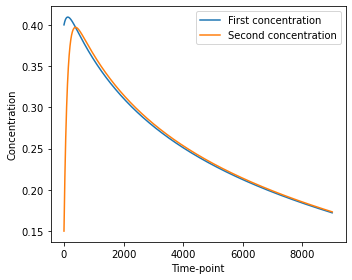

In [43]:
# Uncomment the following line if you have not computed yet A and I
A, I = answer_results(4, A=0.4, I=0.15, dt=dt, k=k, tau=tau, n=n)
plot_concentration_1cell(A, I)

## 4. Introduction to functions
---
You have seen some functions previously, for example the functions `print`, `eval`, `input` or `range` for example which are `builtin` functions, functions that are "in" Python. You've also seen the functions `anwser`, `hint`, `da_alone`, `da` or `di` which are function that have been imported (here via the commands `from Resources.UsefulFunctions import *` and `from Resources.Answers import answer, hint`)

A function is a piece of code that can be called at any time once defined. Functions are especially useful as you may have notice, when you know that you will want to call a piece of code multiple times, maybe with different inputs. For example, you called the function `print` with many different inputs.

Functions are extremely powerful and can be manipulated in an extremely precise way. You can find all about that [there](https://docs.python.org/3/tutorial/controlflow.html#defining-functions).

That being said, the main idea is that a function can be defined the following way:
```python
def fib(n):
    """
    This function returns the highest fibonacci
    number which is lower than n.
    
    Args:
        n (int): upper boundary for the fibonacci number
    
    Returns:
        (int): higher fibo number lower than n
    """
    a, b = 0, 1
    while b < n:
        a, b = b, a+b
    return a
```
As explained, this function has to do with Fibonacci numbers (they are pretty cool, you can find out more [here](https://en.wikipedia.org/wiki/Fibonacci_number)).

The first line:
```python
def fib(n):
```
is the name of the function (`fib`) followed by the sequence of arguments of the function (here there is only one: `n`).

The following lines:
```python
    """
    This function returns the highest fibonacci
    number which is lower than n.
    
    Args:
        n (int): upper boundary for the fibonacci number
    
    Returns:
        (int): higher fibo number lower than n
    """
```
are the description of the function.

Then, there is the code of the function:
```python
    a, b = 0, 1
    while b < n:
        a, b = b, a+b
```

And finally the last last line:
```python
    return a
```
which informs the program what will the function return.

You can run the code bellow to define the function and to test it:

In [44]:
def fib(n):
    """
    This function returns the highest fibonacci
    number which is lower than n.
    
    Args:
        n (int): upper boundary for the fibonacci number
    
    Returns:
        (int): higher fibo number lower than n
    """
    a, b = 0, 1
    while b<n:
        a, b = b, a+b
    return a

fib(2000)
fib?

### Exercice 6
Write a function that returns the lists of concentrations `A` and `I` given the parameters `dt`, `k`, `tau` and `n` and the initial concentrations `a` and `i`.

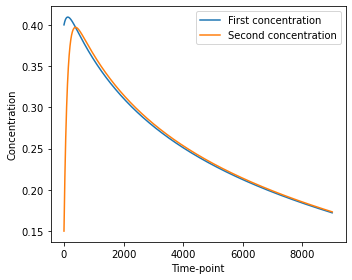

In [45]:
def compute_AI(): # Don't forget to add arguments
    # A, I = [a], [i] 
    # Uncoment above and
    # Do something here
    return A, I

A, I = compute_AI()
plot_concentration_1cell(A, I)

> __*To go (a little bit) further*__
> 
> If one wants to use a function, expecially a function that you have not write yourself, it is extremely important to document the function.
> You might have seen earlier one way to document a function (the function `fib`).
> It is one way to help a user to understand what your function is doing, what should be the parameters given as an input and what the user should expect as an output.
> To write comments, there are rules that can be followed, you can find a version of these rules there: [Google Python Style Guide](https://google.github.io/styleguide/pyguide.html#38-comments-and-docstrings).
> Another way to help the user is by specifying the types of the input and outputs in the function name like that for example:
> ```python
> def fib(n: int) -> int:
>     """
>     This function returns the highest fibonacci
>     number which is lower than n.
>     
>     Args:
>         n (int): upper boundary for the fibonacci number
>     
>     Returns:
>         (int): higher fibo number lower than n
>     """
>     a, b = 0, 1
>     while b<n:
>         a, b = b, a+b
>     return a
> ```
> Another example:
> ```python
> def foo(a: int, b: np.ndarray, c: bool, d: str) -> (dict, list, float):
>     # Function that does something
>     a, b, c = {1:2}, [1, 2], 3.14
>     return a, b, c
> ```
> Note that here, for the format of b (np.ndarray) to work, numpy has to be imported first.

In [46]:
import numpy as np
def foo(a: int, b: np.ndarray, c: bool, d: str) -> (dict, list, float):
    # Function that does something
    a, b, c = {1:2}, [1, 2], 3.14
    return a, b, c
foo?

### Exercice 7
**(With an intermezzo about file manipulation)**

You can play with the different parameters to see how the concentration dynamics change according to these parameters.

Here we would like you to systematically try different parameters and save the produced plots as png files with names containing the parameter values (for example `'test_a0.4_i0.15_dt0.001_k-0.005_tau0.1.png'`).

To save the produced plots, you can use the argument `save_path` of the function `plot_concentration_1cell`.
If you set its value to the file name and path you want to create, it will save it there under its name.

Before being able to do so, you might need some information about how to manipulate strings.
In the previous exercices you might have seen that it is possible to insert values from variables within a string using the curved brackets `{` and `}`.

Simply putted, the way it works is by putting the character `f` before your string and then everything within curved brackets will be transformed in string if possible.
For example:
```python
f'test_a{A[0]}_i{I[0]}_dt{dt}'
```
will produce the following string:
```python
'test_a0.4_i0.15_dt0.001'
```
Note that if the `f` is not in front of the string, the curved brackets will be interpreted as normal characters.

**For more on string manipulation, you can read [there](https://docs.python.org/3/tutorial/inputoutput.html#input-and-output)**

In [47]:
print(f'test_a{A[0]}_i{I[0]}_dt{dt}')
print('test_a{A[0]}_i{I[0]}_dt{dt}')

test_a0.4_i0.15_dt0.001
test_a{A[0]}_i{I[0]}_dt{dt}


#### Avoiding cramping up you current folder
If you want to be a little bit cleaner, you can create a folder in which you will save your images.

You can create such a folder directly in python using `Path` from the `pathlib` library and the command:
```python
Path.mkdir('<folder_name>')
```
For example, to crate a folder named `question_7` one could run the command
```python
Path.mkdir('question_7')
```

Though, if the folder already exists, the command line will not work and stop the notebook from running.
To avoid such a problem, it is possible to check whether the folder already exists using the method `exists` of `Path` as shown below.

Let's create the folder `question_7`:

In [48]:
from pathlib import Path
folder = Path('question_7')
if not folder.exists():
    Path.mkdir(folder)

#### Path manipulation
Some of you might already be aware that playing with path can be a pain.
The problem comes from the fact that Windows has a different way to represent a path to a folder than Linux and MacOs.

> **_Side Note: what's a path?!_**
> 
> In a computer the folders and files are organized hierarchically.
> What it means is that each file or folder except for one, the root, is in a folder.
> For example, the folder you created earlier (`question_7`) is itself in a folder.
> 
> To access a file or folder, it is sometimes necessary to know the sequence of folders it is in so there is no ambiguity for the computer.
> The sequence of folders a folder or a file belongs to is the **path** and it can be represented as a string.
> For example, you can call the function `Path.cwd` (for current working directory).
> To query the list of directories your notebook is running in:

In [49]:
print('Our current path:')
print(Path.cwd())

Our current path:
/Users/guignardl/dvlp/CenTuri-Course-2022


> You can maybe see that the folders are separated by a `/` (or a `\` for Windows).
> This difference between Linux or MacOs and Windows has been quite a source of trouble, some of you might have experienced it.

Now, to save an image in the folder `'question_7'`, as we would like to do, we just need to concatenate the image name to the folder name:
```python
folder / 'test_a0.4_i0.15_dt0.001.png'
```

Note that the `/` in this case is a concatenation operator specific to the objects of the `path` library. The operator concatenates two `Path` or a `Path` and a `str` putting the operating specific folder separator (
`/` or `\`).

**More info about the `pathlib` can be found [there](https://docs.python.org/3/library/pathlib.html)**

In [50]:
## folder is the path previously created
# Concatenation of two Paths
print(folder / Path('test_a0.4_i0.15_dt0.001.png'))
# Concatenation of a Path and a str (same result)
print(folder / 'test_a0.4_i0.15_dt0.001.png')

question_7/test_a0.4_i0.15_dt0.001.png
question_7/test_a0.4_i0.15_dt0.001.png


Now we can *cleanly* answer question 6.
Let assumes that we want the following values:
- `tau` changes from `0.05` to `3` and that we want `5` values within that interval
- `k` changes from `-1` to `1` and that we also want `5` values within that interval
- and a fixed `dt=0.01`

**Write some lines of code to compute and save the requested plots**

Note: you can use the function `np.linspace` to generate the desired values

In [51]:
import numpy as np
folder = Path('question_7')
for test_tau in np.linspace(.05, 1, 5):
    for test_k in np.linspace(-1, 1, 5):
        A, I = answer_results(4, A=0.4, I=0.15, dt=dt, k=test_k, tau=test_tau, n=n)
        plot_concentration_1cell(A, I,
                                 save_path=folder / f'k{test_k}_tau{test_tau}.png')

An interesting configuration where we can see some oscillations:
- `dt=0.01`
- `k=0.05`
- `tau=2`

You can manually change the parameters to try to find other *weird* configurations

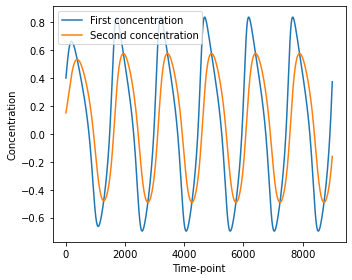

In [52]:
A, I = answer_results(4, A=0.4, I=0.15, dt=.01, k=.05, tau=2, n=n)
plot_concentration_1cell(A, I)

### Exercice 8
**This exercice is difficult, it might take a bit longer to solve. If you are stuck, don't hesitate to look at the following cells for some help**

For this exercice, we will discuss about file manipulation, in other words how to move files automatically.

**Attention here! Proceed with caution for this exercice but also in general. Files removed using Python (or the shell for example) do not end up in the trash but are directly removed!**

In this exercice we would like to sort the files created in the previous exercice. We would like to group the plots generated previously in folders by values of `k` and so that the folder are named according to that `k` value.

For example if you had the following files in your `exercice_7` folder:
```
exercice_7:
 | k0_tau0.png
 | k0_tau1.png
 | k0_tau2.png
 | k1_tau0.png
 | k1_tau1.png
 | k1_tau2.png
 | k2_tau0.png
 | k2_tau1.png
 | k2_tau2.png
```
We would like you to create the following hierarchy:
```
exercice_7:
 | k0:
   | k0_tau0.png
   | k0_tau1.png
   | k0_tau2.png
 | k1:
   | k1_tau0.png
   | k1_tau1.png
   | k1_tau2.png
 | k2:
   | k2_tau0.png
   | k2_tau1.png
   | k2_tau2.png
```

To do so you can use the following functions (assuming `p` is a `Path`):
- `Path.iterdir` allows to loop through all the files of a directory
- `p.name` retrieves the name of the file in `p` as a `str`
- `str.split` splits a string
- `Path.exists` see above
- `p.rename` allows to rename (and therefore move) `p`

Do not hesitate to look at the help of each of these functions (you should do it!).

In [53]:
p = Path('question_7')
for file in p.iterdir():
    ## Do things here
    print(file)

question_7/k0.0_tau0.7625.png
question_7/k-0.5_tau0.2875.png
question_7/k-1.0_tau0.7625.png
question_7/k0.5_tau0.525.png
question_7/k0.0_tau0.05.png
question_7/k0.5_tau0.2875.png
question_7/k-1.0_tau1.0.png
question_7/k1.0_tau0.7625.png
question_7/k-1.0_tau0.05.png
question_7/k-1.0_tau0.525.png
question_7/k0.5_tau0.05.png
question_7/k-0.5_tau1.0.png
question_7/k-1.0_tau0.2875.png
question_7/k1.0_tau0.05.png
question_7/k-0.5_tau0.525.png
question_7/k-0.5_tau0.7625.png
question_7/k-0.5_tau0.05.png
question_7/k0.0_tau0.2875.png
question_7/k0.0_tau1.0.png
question_7/k0.0_tau0.525.png
question_7/k1.0_tau0.2875.png
question_7/k1.0_tau0.525.png
question_7/k1.0_tau1.0.png
question_7/k0.5_tau0.7625.png
question_7/k0.5_tau1.0.png


### Help for exercice 8
Because the difficulty increased significantly with this exercice, here is some leads that hopefully will help you solving the exercice!

One way to solve a coding problem is to decompose it in multiple smaller problems.
There are often multiple ways to decompose a problem, we will show you one here, it might not be the optimal one (regardless of the optimal metric used) but it should be a working one.
To build that decomposition, it can sometimes be useful to rephrase the problem in terms of what you want the code to do:

<details>
    <summary><b>Click here to display the pseudo-code<b/></summary>
    
```
for each file in folder do (1)
    if the file is a png file do (2)
        k_value <- get what is the value of k for that file (3)
        if folder with k value does not exist do (4)
            create new folder with k value 
        end if
        move file to folder with k value (5)
    end if
end for
```

</details>


This decomposition allows to identify the important points in the code and to organize the code to be produced.
Here, we want to loop on the files (1), check if the file is a file of interest (2), retrieve the value of `k` in the file name (3), create a folder with the `k` value if necessary (4) and move the file in the appropriate folder (5).
        
Now, one can try to solve the 5 problems independently and utimately assemble them to answer the question.

## 5. From 0D to 1D !
---
Now, back to our Turing patterns!

We have seen how to model the concentration of an activator and inhibitor when they are express simultaneously.

This is the very beginning of Turing patterns but it is of course not enough!
The modeling that we have done was focused on time.
Because we only had one cell (so much so that we did not even mentioned that it was a cell), we did not look at the interaction with the neighbors and by extension, we did not look at the spatial dimension.

So in this part we will integrate the spatial dimension to our model.

### 5.1 Representing a row of cells that are behaving independently.
First thing first, before playing with diffusion, we will display a row of cells that each have the previous small model embeded within but with a different, random, starting point.

To do so, we will use a `ndarray`.
Our `ndarray` will have two dimensions.
The first dimension with be our spatial dimension, the second dimension will be the time.

To initialize a `ndarray` it is necessary set its size. In our case, it will be the number of cells `size` and the number of time points `n`.

### Exercice 9
Using the function `np.zeros` build an array named `A` (for activator) of dimensions `size * n`

In [54]:
A = np.zeros((size, n))
print(f'A -->\n{A}\n')
print(f"""expected A -->
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]\n""")
print(f'A.shape          --> {A.shape}')
print(f'expected A.shape --> (100, 9000)')

A -->
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]

expected A -->
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]

A.shape          --> (100, 9000)
expected A.shape --> (100, 9000)


This table represent the concentration of your activator `A` at each time-point.

For example `A[0, 100]` gives you the concentration of the cell `0` at time-point `100`. It is sometimes confusing to me whether the cell is first or the gene concentration. One way to remember is to look at the `shape` of the table (which is its dimension). Here the shape is `(100, 9000)`, so the first component is the cell (since there are 100 of them).

### Exercice 10

Access the values of the 4 first time-points for the last 3 cells

In [55]:
# get a random table, but always the same oO
# It helps making sure that you are actually
# slincing in the correct position in the array
out = get_random_table(100, 900)
spliced_out = out[:]
print(f'your spliced_out -->\n{spliced_out}\n')
print(f"""expected spliced_out -->
[[0.39945761 0.11419206 0.1451694  0.71413739]
 [0.64262546 0.81164219 0.2139838  0.74270111]
 [0.86262341 0.36115707 0.31575497 0.39177027]]
 """)

your spliced_out -->
[[0.5488135  0.71518937 0.60276338 ... 0.62773476 0.40142795 0.41669176]
 [0.81083862 0.34819194 0.2114548  ... 0.56112093 0.83654718 0.27805024]
 [0.54695006 0.29361682 0.96820439 ... 0.60916405 0.77595844 0.07614516]
 ...
 [0.39945761 0.11419206 0.1451694  ... 0.52230401 0.08582557 0.46552449]
 [0.64262546 0.81164219 0.2139838  ... 0.76224084 0.23274637 0.85764766]
 [0.86262341 0.36115707 0.31575497 ... 0.56425734 0.60526059 0.93545513]]

expected spliced_out -->
[[0.39945761 0.11419206 0.1451694  0.71413739]
 [0.64262546 0.81164219 0.2139838  0.74270111]
 [0.86262341 0.36115707 0.31575497 0.39177027]]
 


Now that you can access some places in your table, it is good to know that you can also modify the values that you are accessing.

For example we saw previously that you can add values to an array, well you can do so too for splices of an array:

In [56]:
A = np.zeros((size, n))
print(f"A -->\n{A}\n")
print(f"A[:5, :5] -->\n{A[:5, :5]}\n")

# Adding 1 to the five first time points of the five first cells
A[:5, :5] = A[:5, :5] + 1
print('A[:5, :5] = A[:5, :5] + 1\n')
print(f"A[:5, :5] -->\n{A[:5, :5]}\n")
print(f"A -->\n{A}\n")

A -->
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]

A[:5, :5] -->
[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]

A[:5, :5] = A[:5, :5] + 1

A[:5, :5] -->
[[1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]]

A -->
[[1. 1. 1. ... 0. 0. 0.]
 [1. 1. 1. ... 0. 0. 0.]
 [1. 1. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]



You can also use the `+=`, `*=`, `/=`, ... operators:

In [57]:
A = np.zeros((size, n))
print(f"A[:5, :5] -->\n{A[:5, :5]}\n")

# Adding 1 to the five first time points of the five first cells
A[:5, :5] += 1

print(f"A[:5, :5] -->\n{A[:5, :5]}\n")

A[:5, :5] -->
[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]

A[:5, :5] -->
[[1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]]



Not only you can add values but you can also assign the values of another array (which is, if you think about it, what we actually already did with the line `A[:5, :5] = A[:5, :5] + 1`):

In [58]:
A = np.zeros((size, n))
print(f"A -->\n{A}\n")

# Changing the values to values from 0 to 24
A[:5, :5] = np.arange(5*5).reshape(5, 5)
print('A[:5, :5] = np.arange(5*5).reshape(5, 5)\n')
print(f"A[:5, :5] -->\n{A[:5, :5]}\n")
print(f"A -->\n{A}\n")

A -->
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]

A[:5, :5] = np.arange(5*5).reshape(5, 5)

A[:5, :5] -->
[[ 0.  1.  2.  3.  4.]
 [ 5.  6.  7.  8.  9.]
 [10. 11. 12. 13. 14.]
 [15. 16. 17. 18. 19.]
 [20. 21. 22. 23. 24.]]

A -->
[[ 0.  1.  2. ...  0.  0.  0.]
 [ 5.  6.  7. ...  0.  0.  0.]
 [10. 11. 12. ...  0.  0.  0.]
 ...
 [ 0.  0.  0. ...  0.  0.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]]



**_Important here:_**

**_The shape of the array you are modifying must match the shape of the array you are modifying it with:_**

In [59]:
A = np.zeros((size, n))
try:
    A[:5, :5] = np.ones((5, 4))
except Exception as e:
    print("The previous line did not work!")
    print("Here is the error output:")
    print(f"\t{e}")

The previous line did not work!
Here is the error output:
	could not broadcast input array from shape (5,4) into shape (5,5)


Now, we know a little bit better how to manipulate arrays, we want to initialize the values of the cells at the first time-point at "random" (note that there is no real random with computers).

To do so we can use the function `random` from `np.random`. The function takes as an input the size of the table to create for example:

In [60]:
np.random.random((4, 4))
np.random.random?

creates a `4*4` array filled with uniformly distributed random numbers between 0 and 1.

> **_To go further_**
>
> For reasons that we will not expose here, it can be mathematically proven that any known random distribution can be simulated using a uniform distribution in [0, 1), (`)` means the 1 is excluded).

### Exercice 11
Now, we want to fill the values, at the first time point, for all the cells with random floating numbers between 0 and 1.
> Notice the line `np.random.seed(0)`, it allows to control the "randomness" of the generation so you can compare your result to what should be expected

In [61]:
A = np.zeros((size, n))
np.random.seed(0) # Note the seeding here, changing the value will create different results
# Do your thing bellow

# Checking the results at random positions
rand_pos = np.round(np.random.random()*100).astype(int)
print(f"A[rand_pos, 0]           --> {A[rand_pos, 0]}")
print(f"Expected A[rand_pos, 0]  --> {0.8379449074988039}")
rand_pos = np.round(np.random.random()*100).astype(int)
print(f"A[rand_pos, 0]           --> {A[rand_pos, 0]}")
print(f"Expected A[rand_pos, 0]  --> {0.9446689170495839}")

print(f"All other values are 0s? --> {np.all(A[:, 1:]==0)} (should be True)" )

A[rand_pos, 0]           --> 0.0
Expected A[rand_pos, 0]  --> 0.8379449074988039
A[rand_pos, 0]           --> 0.0
Expected A[rand_pos, 0]  --> 0.9446689170495839
All other values are 0s? --> True (should be True)


> **_Side note_**
> 
> In the prepvious examples we used `np.random.random` or `np.random.seed`.
> When using several functions from a sub library (as it is the case here, `random` is a sub library of numpy), one can import it directly like so for example:
> ```python
> import numpy.random
> ```
> or that way (which is equivalent):
> ```python
> from numpy import random
> ```

Now we have initialized our array for the activator with random values at the first time-point. Remains to fill the other time-points but to do so, one has to first initialize the inhibitor array.

### Exercice 12
Initialize the inhibitor array `I` as you did for the activator array (we will fixe our seed to 1 this time to have different values)

In [62]:
I = np.zeros((size, n))
np.random.seed(1) # again, the seed here to ensure the results
# Do your stuff below

rand_pos = np.round(np.random.random()*100).astype(int)
print(f"I[rand_pos, 0]           --> {I[rand_pos, 0]}")
print(f"Expected A[rand_pos, 0]  --> {0.5331652849730171}")
rand_pos = np.round(np.random.random()*100).astype(int)
print(f"I[rand_pos, 0]           --> {I[rand_pos, 0]}")
print(f"Expected I[rand_pos, 0]  --> {0.2655466593722262}")

print(f"All other values are 0s? --> {np.all(I[:, 1:]==0)} (should be True)" )

I[rand_pos, 0]           --> 0.0
Expected A[rand_pos, 0]  --> 0.5331652849730171
I[rand_pos, 0]           --> 0.0
Expected I[rand_pos, 0]  --> 0.2655466593722262
All other values are 0s? --> True (should be True)


Now we have our row of cells for the inhibitor and activator, we have initialized the first time-point for each of the cells, remains to fill the values for the remaining time-points.

To do so we can use the function `compute_AI` that we defined earlier:
<details>
    <summary><b>Click here to show the answer to question 6</b></summary>
    
    
```python
def compute_AI(a, i, dt, k, tau, n):
    A, I = [a], [i]
    for t in range(n-1): # the -1 is because the first value
                         # is already in the array
        new_A = A[-1] + da(A[-1], I[-1], dt, k)
        new_I = I[-1] + di(I[-1], A[-1], dt, tau)
        I.append(new_I)
        A.append(new_A)
    return A, I
```
    
</details>

To recover this function you can run the following code:
```python
compute_AI = retrieve_compute_AI()
```

As a reminder, the function `compute_AI` takes as an input the parameters of the model (`dt`, `k`, `tau` and `n`) together with initial values of activator and inhibitor concentrations and returns a list of the evolution of all the `n` values over time.

### Exercice 13
Write a `for` loop that fills all the array cells using the function `compute_AI`

In [63]:
compute_AI = retrieve_compute_AI()
A = np.zeros((size, n))
I = np.zeros((size, n))
np.random.seed(0)
A[:, 0] = np.random.random(100)
np.random.seed(1)
I[:, 0] = np.random.random(100)

# Code the loop here

You can check you results by comparing the tables you obtained with the table you get with the function `answer_results`.

To compare two tables you can use the `==` sign or the function `np.allclose` for example.

In [64]:
A_ans, I_ans = answer_results(13, A=A, I=I, dt=dt, k=k, tau=tau, n=n)

if np.alltrue(A_ans==A) and np.alltrue(I_ans==I):
    print('My results are the same as what is expected')
elif np.allclose(A_ans, A) and np.allclose(I_ans, I):
    print('My results are all close to what is expected')
else:
    print('My results are different to what was expected')

My results are different to what was expected


Now, the concentration over time of the activator or the inhibitor of each cell are in the arrays `A` and `I`.
You can plot these values for each cells using the previously shown function `plot_concentration_1cell`. Here is an example for the 50$^{th}$ and 3$^{rd}$ cells:

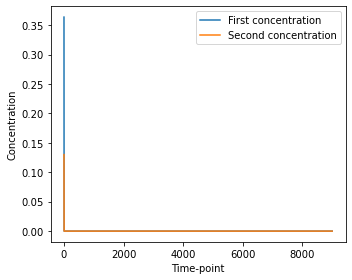

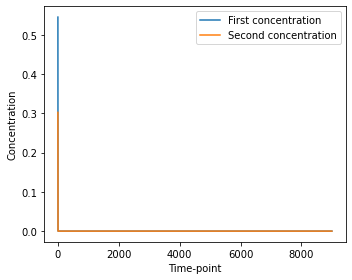

In [65]:
plot_concentration_1cell(A[49], I[49])
plot_concentration_1cell(A[3], I[3])

Using the previous plots to visualize all the cells at the same time is not really convenient.

One problem is that on a screen we are moslty bounded to two dimensions.
In the previous plot we use one dimension for the time and the other one for the level of concentration so we don't have any remaining dimension for space (our cells).

One way around that is to use colors for the level of concentration so we have space and time as our dimensions.

This is what is done in the function `plot_concentration_1D`:

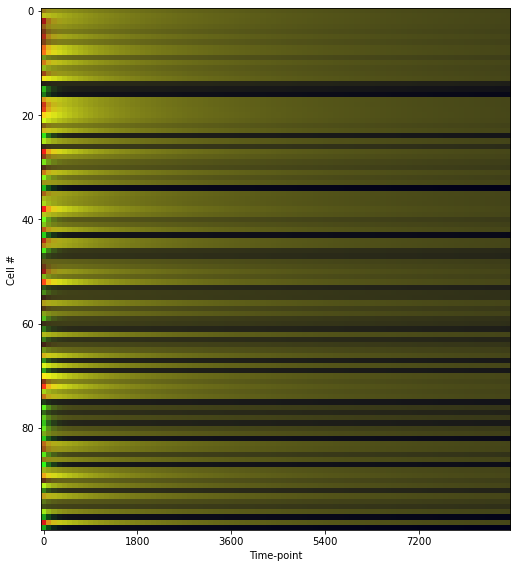

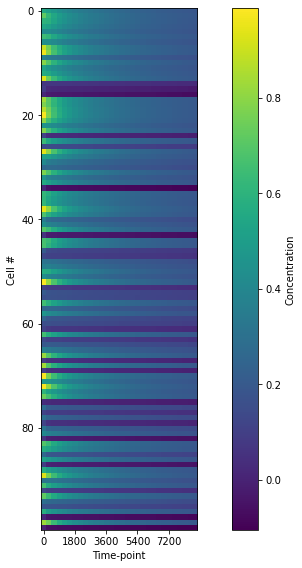

In [66]:
plot_concentration_1D(A_ans, I_ans, step=100)
plot_concentration_1D(A_ans, step=300)

Now we can have a look at the result with the oscilatory parameters found earlier:

In [67]:
A = np.zeros((size, n))
I = np.zeros((size, n))
np.random.seed(0)
A[:, 0] = np.random.random(100)
np.random.seed(1)
I[:, 0] = np.random.random(100)
A_osci, I_osci = answer_results(13, A=A, I=I, dt=.01, k=.05, tau=2, n=n)

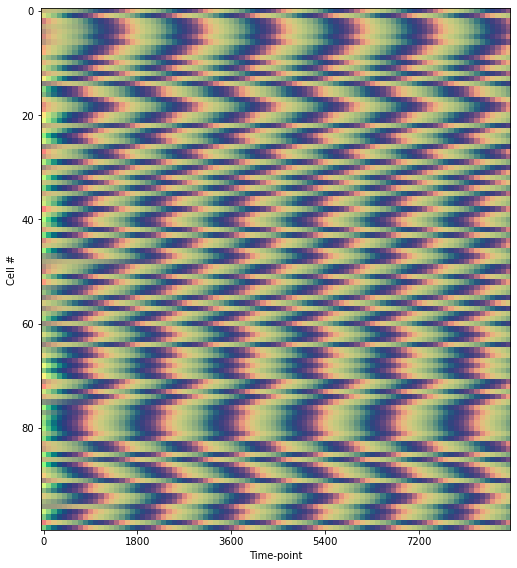

In [68]:
plot_concentration_1D(A_osci, I_osci, step=100)

### 5.2 Adding latteral diffusion
Now, we are going to start doing real 1D!

The idea is that, up to now, we are able to have a row of cells that are acting next to each other but independently. We want to add to that the diffusion process of the Turing patterns: the $\mu_a\Delta a$ and $\mu_i\Delta i$.

We model the lateral diffusion for a given cell as simply as possible. The diffusion is a proportion (the parameters $\mu_a$ and $\mu_i$) of concentration that a cell recieve from its direct neighbors minus what that cell gives to its neighbor, which is twice a given proportion of its own concentration (the proportion being $\mu_a$ for the activator and $\mu_i$ for the inhibitor). 

Now, if $a_x$ is the activator concentration in the cell at the position $x$, we can formalize the previous sentence as follow:
$$
\mu_a\Delta a_x = \mu_a \frac{a_{x+\delta x} + a_{x-\delta x} - 2a_x}{\delta x}
$$

Therefore, after diffusion for a given time $\delta t$, the concentration $a_x$ becomes is:
$$
a_{x, t+\delta t} = a_{x, t} + \delta t\mu_a\Delta a_{x,t} = a_{x,t} + \delta t\mu_a \frac{a_{x+\delta x, t} + a_{x-\delta x, t} - 2a_{x, t}}{\delta x}
$$
We tried to explain that with the following figure:
<img src="Images/Diffusion.png" alt="Diffusion" width="500"/>

Now that we have explained the theory (which might look a bit scary at first glance), lets see how we can implement that in practice.

As before, we need to compute the concentration of $A$ and $I$ for each cell.
The difference is that before it was only depending on what was in that cell, now it also depends on what was in the neighboring cells.

Before (no neighborhood interaction), i:
```python
A[i, t] = A[i, t-1] + dt * (A[i, t-1] - A[i, t-1]**3 - I[i, t-1] + k)
I[i, t] = I[i, t-1] + dt/tau * (A[i, t-1] - I[i, t-1])
```

After (with neighborhood interaction):
```python
A[i, t] = A[i, t-1] + dt * (mu_a*(A[i-1, t-1] + A[i-1, t+1] - 2*A[i, t-1]) +\
                            A[i, t-1] - A[i, t-1]**3 - I[i, t-1] + k)
I[i, t] = I[i, t-1] + dt/tau * (mu_i*(I[i-1, t-1] + I[i-1, t+1] - 2*I[i, t-1]) +\
                                A[i, t-1] - I[i, t-1])
```

What it means in practice is that, to compute the concentration of the activator or the inhibitor for a given cell, not only we need to know what was happening at the previous time in that cell but we also need to know what was happening in the neighboring cells.

### Exercice 14 (kind of a tough one 😨)

Because we are adding a new dimension to our problem, most of what we have developped until now becomes obsolete ...

This is because our two base functions (`da` and `di`) on which we built everything else do not take neighboring cells as a parameter.

So ... we now have to rewrite the functions `da` and `di` so that they do take into account the lateral diffusion. And because we are now a bit more advanced, we will write them into one function that takes as input a row of cells at $t$ and output a the new row of cells at $t+\delta t$.

The function will therefore have the following header:
```python
def dA_I(A: np.array, I: np.array, dt: float, k: float, tau: float,
         dx: float, mu_a: float, mu_i: float) -> (np.array, np.array):
    new_A = np.zeros_like(A)
    new_I = np.zeros_like(I)
    ## Do the correct thing
    return new_A, new_I
```

In [82]:
np.random.seed(0)
A = np.random.random(100)
np.random.seed(1)
I = np.random.random(100)

def dA_I(A, I, dt, k, tau, dx, mu_a, mu_i):
    new_A = np.zeros_like(A)
    new_I = np.zeros_like(I)
    new_A[1:-1] = (A[1:-1] +
                   dt * (1/dx*mu_a*(A[:-2] + A[2:] - 2*A[1:-1]) + 
                         A[1:-1] - A[1:-1]**3 - I[1:-1] + k))
    new_A[0] = (A[0] +
                dt * (1/dx*mu_a*(A[1] - A[0]) + 
                      A[0] - A[0]**3 - I[0] + k))
    new_A[-1] = (new_A[-1] + 
                 dt * (dx*mu_a*(A[-2] - A[-1]) + 
                       A[-1] - A[-1]**3 - I[-1] + k))

    new_I[1:-1] = (I[1:-1] +
                   dt/tau * (1/dx*mu_i*(I[:-2] + I[2:] - 2*I[1:-1]) + 
                             A[1:-1] - I[1:-1]))
    new_I[0] = (I[0] + 
                dt/tau * (1/dx*mu_i*(I[1] - I[0]) + 
                          A[0] - I[0]))
    new_I[-1] = (I[-1] + 
                 dt/tau * (1/dx*mu_i*(I[-2] - I[-1]) + 
                           A[-1] - I[-1]))
    return new_A, new_I

new_A, new_I = dA_I(A, I, dt=dt, k=k, tau=tau,
                    dx=dx, mu_a=mu_a, mu_i=mu_i)

In [83]:
## Checking wether your results are correct:
A_ans, I_ans = answer_results(14, A=A, I=I, dt=dt, k=k, tau=tau,
                              dx=dx, mu_a=mu_a, mu_i=mu_i)

if np.alltrue(A_ans==new_A) and np.alltrue(I_ans==new_I):
    print('My results are the same as what is expected')
elif np.allclose(A_ans, new_A) and np.allclose(I_ans, new_I):
    print('My results are all close to what is expected')
else:
    print('My results are different to what was expected')

My results are different to what was expected


Now, the function `dA_I` gives us the value of `A` and `I` from one time to the next with lateral diffusion.
The next step is to write a `for` loop that allows to compute our systems over all the necessary time-points.

### Exercice 15
Write a `for` loop that computes the concentration of a row of cells over `n` time-points.

In [84]:
A = np.zeros((size, n))
I = np.zeros((size, n))
np.random.seed(0)
A[:, 0] = np.random.random(100)
np.random.seed(1)
I[:, 0] = np.random.random(100)

for t in range(1, n):
    # do what is necessary
    A[:, t], I[:, t] = dA_I(A[:, t-1], I[:, t-1], dt=dt, k=k, tau=tau,
                            dx=dx, mu_a=mu_a, mu_i=mu_i)

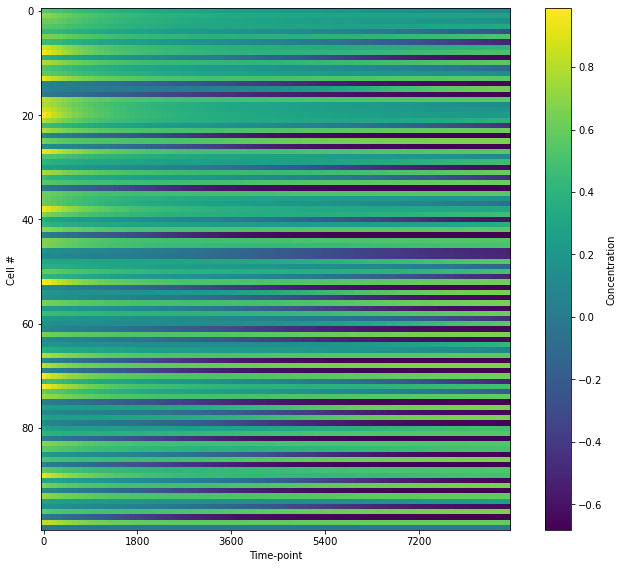

In [86]:
plot_concentration_1D(A, step=100)

While the result is different from what we had before, it is not by a lot.
We can now start playing with the parameters a little bit and check what would be happening to the oscilatory behavior we found earlier:

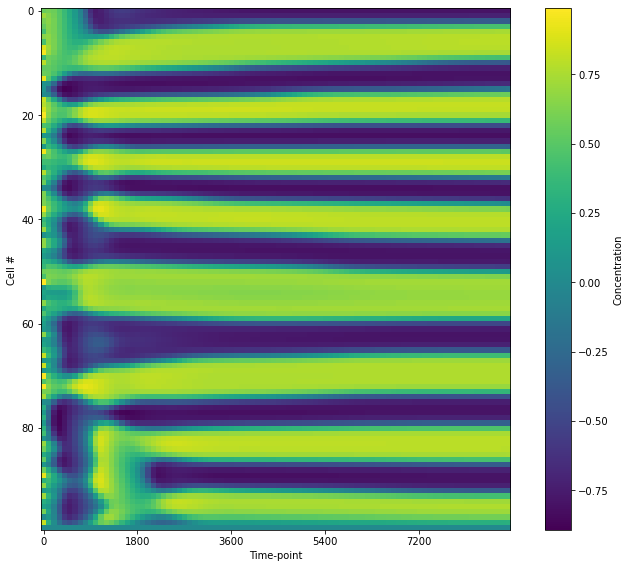

In [110]:
A = np.zeros((size, n))
I = np.zeros((size, n))
np.random.seed(0)
A[:, 0] = np.random.random(100)
np.random.seed(1)
I[:, 0] = np.random.random(100)

for t in range(1, n):
    # do what is necessary
    A[:, t], I[:, t] = dA_I(A[:, t-1], I[:, t-1], dt=.01, k=.05, tau=2,
                            dx=.0005, mu_a=mu_a, mu_i=mu_i)
plot_concentration_1D(A, step=100)

We can see the cells actually synchronizing!

You can now play a bit more with the different parameters before starting the final part: the "real" Turing patterns, in 2D.

In [48]:
# You can "play" here

## From 1 to 2D!
---
Now, we've seen diffusion in 1 dimension, expanding it to 2 dimensions is not that complicated.

First we need to create our array of cells. This is an array of dimension `(size, size, n)`. We will therefore have `size*size` cells over `n` time-points:

In [111]:
A = np.zeros((size, size, n))
I = np.zeros((size, size, n))

Then, initialize the first time-point:

In [112]:
np.random.seed(0)
A[:, :, 0] = np.random.random((size, size))
np.random.seed(1)
I[:, :, 0] = np.random.random((size, size))

Now, the non-diffusive term of our equation are "simple":
```python
A[:, :, t] = A[:, :, t-1] + dt*(A[:, :, t-1] - A[:, :, t-1]**3 + k)
```
and
```python
I[:, :, t] = I[:, :, t-1] + dt/tau*(A[:, :, t-1] - I[:, :, t-1])
```

The diffusion term is slightly more complex since we have to look in the two dimensions as opposed to only one dimension as we did before. It could be written as follow:
```python
A[1:-1, 1:-1, t] = (A[1:-1, 1:-1, t-1] + 
                    dt*(mu_a*(  A[:-2, 1:-1] + A[2:, 1:-1]
                              + A[1:-1, :-2] + A[1:-1, 2:]
                              - 4*A[1:-1, 1:-1]) +
                        A[:, :, t-1] - A[:, :, t-1]**3 + k))
```
and similarly for the inhibitor `I`.

To avoid writting that long expression, we will convolve our 2D array of cells with a kernel of the cells that we want to process.

In [116]:
from scipy.ndimage import convolve
from scipy.signal import convolve2d
convolve?

The kernel represents the cells that we are considering as neighbors for diffusion:

In [78]:
kernel = [
    [0, 1, 0],
    [1, 0, 1],
    [0, 1, 0]
]

Now, if we convolve our kernel (with the correct parameters), we our image we will get the sum of the value of our neighbors. To see a bit better how it works, let's have a look at the result on a small array with ones everywhere:

In [122]:
test_array = np.ones((4, 4), dtype=int)
print(test_array)
res_conv = convolve(test_array, kernel, mode='constant', cval=0)
print(res_conv)
res_conv2 = convolve2d(test_array, kernel, mode='same')
print(res_conv2)

[[1 1 1 1]
 [1 1 1 1]
 [1 1 1 1]
 [1 1 1 1]]
[[2 3 3 2]
 [3 4 4 3]
 [3 4 4 3]
 [2 3 3 2]]
[[2 3 3 2]
 [3 4 4 3]
 [3 4 4 3]
 [2 3 3 2]]


In [124]:
test_array = np.ones((100, 100), dtype=int)
%timeit convolve2d(test_array, kernel, mode='same')
%timeit convolve(test_array, kernel, mode='constant', cval=0)

373 µs ± 4.84 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
94.2 µs ± 577 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


You can note that in our example, it gives us the number of neighbors. This is a value we need to know how much a cell has to "give" to its neighbors.

Now we can "easily" compute the diffusion term as follow:

In [80]:
nb_neighbs = convolve(np.ones_like(A[:, :, 0]), kernel, mode='constant', cval=0)
to_cell = convolve(A[:, :, 0], kernel, mode='constant', cval=0)
from_cell = nb_neighbs*A[:, :, 0]
diff_A = mu_a*(to_cell - from_cell)/(dx*dy)

### Exercice 16
Write a function `diffusion` that takes as an input an array of cells `arr`, the number of neighbors `nb_neighbs`, a kernel `kernel` and a diffusion coefficient `mu` and outputs the diffusion term.

In [81]:
## Here you write the function
def diffusion(arr, nb_neighbs, kernel, mu, dx, dy):
    to_cell = convolve(arr, kernel, mode='constant', cval=0)
    from_cell = nb_neighbs*arr
    out = mu*(to_cell - from_cell)/(dx*dy)
    return out

In [74]:
# you can test your function here:
from Resources.UsefulFunctions import *
from Resources.Answers import answer, hint

mu_a = 2.8e-4
mu_i = 5e-3
tau = .1
k = -.005
size = 100
dx = dy = 2. / size
T = 9.0
dt = .001
n = int(T / dt)

np.random.seed(0)
A[:, :, 0] = np.random.random((size, size))
np.random.seed(1)
I[:, :, 0] = np.random.random((size, size))

nb_neighbs = np.ones_like(A[:, :, 0])
kernel = np.array([[0, 1, 0],
                   [1, 1, 1],
                   [0, 1, 0]])

diff_A = diffusion(A[:, :, 0], nb_neighbs, kernel, mu_a, dx, dy)
diff_I = diffusion(I[:, :, 0], nb_neighbs, kernel, mu_i, dx, dy)
test_diff_A = answer_results(16, arr=A[:, :, 0], 
                             nb_neighbs=nb_neighbs,
                             kernel=kernel, mu=mu_a)
test_diff_I = answer_results(16, arr=I[:, :, 0], 
                             nb_neighbs=nb_neighbs,
                             kernel=kernel, mu=mu_i)
if np.alltrue(diff_A==test_diff_A) and np.alltrue(diff_I==test_diff_I):
    print('My results are the same as what is expected')
elif np.allclose(diff_A, test_diff_A) and np.allclose(diff_I, test_diff_I):
    print('My results are all close to what is expected')
else:
    print('My results are different to what was expected')

IndexError: too many indices for array: array is 2-dimensional, but 3 were indexed

Now, our former "complex" formula where we had to check for the edge cases (that we hadn't done yet) was like that:
```python
A[1:-1, 1:-1, t] = (A[1:-1, 1:-1, t-1] + 
                    dt*(mu_a*(  A[:-2, 1:-1] + A[2:, 1:-1]
                              + A[1:-1, :-2] + A[1:-1, 2:]
                              - 4*A[1:-1, 1:-1]) +
                        A[:, :, t-1] - A[:, :, t-1]**3 + k))
```
can be rewritten that way:
```python
diff_A = diffusion(A[:, :, t-1], nb_neighbs, kernel, mu_a)
A[:, :, t] = A[:, :, t-1] + dt*(diff_A + A[:, :, t-1] - A[:, :, t-1]**3 + k)
```
and
```python
diff_I = diffusion(I[:, :, t-1], nb_neighbs, kernel, mu_i)
I[:, :, t] = I[:, :, t-1] + dt/tau*(diff_I + A[:, :, t-1] - I[:, :, t-1])
```

Which is somewhat "easier"

### Exercice 17
Write a `for` loop that compute the value of activators and inhibitors for each cell over the desired time period.

In [97]:
# Write the for loop here
mu_a = 2.8e-4
mu_i = 5e-3
dx = 2. / size
dt = .001
for t in range(1, n):
    diff_A = diffusion(A[:, :, t-1], nb_neighbs, kernel, mu_a, dx, dy)
    A[:, :, t] = A[:, :, t-1] + dt*(diff_A + A[:, :, t-1] - A[:, :, t-1]**3 + k)
    diff_I = diffusion(I[:, :, t-1], nb_neighbs, kernel, mu_i, dx, dy)
    I[:, :, t] = I[:, :, t-1] + dt/tau*(diff_I + A[:, :, t-1] - I[:, :, t-1])
    for out in (A, I):
        out[0, :] = out[1, :]
        out[-1, :] = out[-2, :]
        out[:, 0] = out[:, 1]
        out[:, -1] = out[:, -2]

/var/folders/dk/gjswl12567v7htcvqh6qhh7jp9y77k/T/ipykernel_12711/1000674473.py:5: RuntimeWarning: overflow encountered in true_divide
  out = mu*(to_cell - from_cell)/(dx*dy)
/var/folders/dk/gjswl12567v7htcvqh6qhh7jp9y77k/T/ipykernel_12711/1000674473.py:5: RuntimeWarning: invalid value encountered in subtract
  out = mu*(to_cell - from_cell)/(dx*dy)


In [101]:
# plt.imshow(A[10:-10, 10:-10, 1000], vmin=0, vmax=2)
print(f'{np.max(A):.2f}')

1.95


In [ ]:
def diffusion(array, weights):
    """
    Computes the diffusion in 2D given a set of weights.
    The weights are useful for the average at the borders
    of the region considered.
    If this is the region considered:
    [[ 0 0 0 0 0 0 ]
     [ 0 0 1 1 0 0 ]
     [ 0 1 1 1 1 0 ]
     [ 0 1 1 1 1 0 ]
     [ 0 0 1 1 0 0 ]
     [ 0 0 0 0 0 0 ]]
    the weights should be the number of neighbors
    within the mask:
    [[ 0 0 0 0 0 0 ]
     [ 0 0 2 2 0 0 ]
     [ 0 2 4 4 2 0 ]
     [ 0 2 4 4 2 0 ]
     [ 0 0 2 2 0 0 ]
     [ 0 0 0 0 0 0 ]]
    this can be obtained by convolving
    the mask with the following kernel:
    [[ 0 1 0 ]
     [ 1 0 1 ]
     [ 0 1 0 ]]
    
    Parameters
    ----------
    array : ndarray of floats shape NxM
        The array with the initial concentrations
    weights : ndarray of floats of shape NxM
        The weights for the diffusion
    
    Returns
    -------
    out : ndarray of shape NxM
        the initial array after diffusion
        (without taking into account the
        diffusion coefficients)
    """
    kernel = [[0, 1, 0],
              [1, 0, 1],
              [0, 1, 0]]
    out = convolve2d(array, kernel, boundary='symm', mode='same')
    out -= array * weights
    return out

Then we combine the activation/inhibition and diffusion and we get:

$\frac{\delta A_{x, y}}{\delta t\delta x \delta y} = k_{f} A - k_{r} I + \mu(A_{x+\delta x, y} + A_{x-\delta x, y} + A_{x, y+\delta y} + A_{x, y-\delta y} - 4A_{x, y})$

$\frac{\delta I_{x, y}}{\delta t\delta x \delta y} = k_{e} A - k_{d} I + \nu(I_{x+\delta x, y} + I_{x-\delta x, y} + I_{x, y+\delta y} + I_{x, y-\delta y} - 4I_{x, y})$

In [ ]:
def dAI_dtxy(A, I, dt, dx, dy, mu, nu, weights):
    """
    Integrating activation, inhibition and diffusion
    
    Parameters
    ----------
    A : ndarray of floats of shape NxM
        The array containing the initial
        concentration of activators
    I : ndarray of floats of shape NxM
        The array containing the initial
        concentration of inhibitors
    dt : float
        time increment
    dx : float
        size of a pixel in `A` and `I` in µm
        along the `x` dimension
    dy : float
        size of a pixel in `A` and `I` in µm
        along the `y` dimension
    mu : float
        diffusion coefficient for the activator
    nu : float
        diffusion coefficient for the inhibitor
    weights : ndarray of shape NxM
        weights for the diffusion average related
        to the mask considered
    
    Returns
    -------
    A : ndarray of floats of shape NxM
        The array containing the new
        concentration of activators after
        a time dt
    I : ndarray of floats of shape NxM
        The array containing the new
        concentration of inhibitors after
        a time dt
    """
    diffusion_A = diffusion(A, weights)/(dx*dy)
    diffusion_I = diffusion(I, weights)/(dx*dy)
    new_A = A + dt*(dA_dt([A, I]) + mu*diffusion_A)
    new_I = I + dt*(dI_dt([A, I]) + nu*diffusion_I)
    A = new_A
    I = new_I
    A[mask==0] = 0
    I[mask==0] = 0
    return A, I

Carefully chosen parameters, thanks to [Alice Gros](https://twitter.com/_AliceGros) in [@Equipe_lenne](https://twitter.com/Equipe_lenne)

In [ ]:
kAA, kIA, kAI, kII = 10, 12, 31, 20
mu = 0.001
nu = 0.025

# voxel size in the x and y dimensions
dx = dy = 0.02

# step size of time in seconds
dt = 0.000001
# because the timestep has to be smaller
# at the begining we use a variable dt
dt_final = 0.001
variable_dt = np.linspace(dt, dt_final, n)

# Number of iterations
n = 20000
# Number of timepoints to save
nb_times_im = 200

Random initialisation of the circle

Computation of the weight mask

Initialisation of the final array which will contain our data

In [ ]:
# size of the grid onto which the model is run
grid_size = 100
# centre and radius of the circle onto wich
# the model is run
circle_center = [49, 49]
radius = 45

# randomizing the initial state
# change the seed from 1 to any other value
# to observe different results
generator = np.random.default_rng(1)
init_A = generator.uniform(size=(grid_size, grid_size))
init_I = generator.uniform(size=(grid_size, grid_size))

# building the mask to get a circle
# together with the weights related
# to this specific mask.
mask = (outer_circle(np.mgrid[:grid_size, :grid_size], circle_center, r=radius)).astype(np.uint8)
kernel = [[0, 1, 0],
          [1, 0, 1],
          [0, 1, 0]]
weights = convolve2d(mask, kernel, boundary='symm', mode='same')

# Masking the initial position and
# copying it for safety
init_A[mask==0] = 0
init_I[mask==0] = 0
A = init_A.copy()
I = init_I.copy()

# ndarray in which will be stored the results
final_A = np.zeros(A.shape + (nb_times_im+1,))

Running the simulation

In [ ]:
for i in range(n):
    if variable_dt is not None:
        dt = variable_dt[i]
    if i%(n//nb_times_im)==0:
        final_A[...,int(i//(n/nb_times_im))] = A
    A, I = dAI_dtxy(A, I, dt, dx, dx, mu, nu, weights)
    
final_A[...,-1] = A

In [ ]:
# Normalizing the final array using a logistic function
# centered in 0.5 to have values between 0 and 1 but
# a sharper slope between low and high expression
normed_array = norm_array(final_A, mask, func=lambda x:logistic.cdf(x, .5, .05))

Plotting the results

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))
ax.axis('off')
im = ax.imshow(init_A, cmap=cmap)
fig.tight_layout()

def init():
    im.set_data(init_A)
    return(im,)

def animate(i):
    im.set_data(normed_array[...,i])
    return(im,)

anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=nb_times_im, interval=25, 
                               blit=True)

HTML(anim.to_jshtml())

In [ ]:
anim.save('turing.gif', dpi=50)